In [ ]:
# pip libraries 
%pip install opencv-python
%pip install keras
%pip install tensorflow

In [1]:
#importing the libraries 

import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import PIL

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import time
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
# paths for training and testing data
train_dir = './training_set'
test_dir = './test_set'

for ASL data set replace the directory path with the following :

#paths for training and testing data

train_dir = './American_training_set'

test_dir = './American_test_set'

In [3]:
# Define the hyperparameters
batch_size = 32
epochs = 20
image_size = (64, 64) 

In [4]:
# Data preprocessing, augmentation and normalization for training data

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


# Data normalization for training data

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


# Data normalization for validation data

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 45500 images belonging to 26 classes.
Found 6500 images belonging to 26 classes.


# CNN MODEL


In [5]:
# Create a CNN model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 input_shape=(64, 64, 3)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer
model.add(Conv2D(filters=128, 
                 kernel_size=(3, 3), 
                 activation='relu'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flattening layer
model.add(Flatten())

# Add a fully connected (dense) layer
model.add(Dense(units=256, activation='relu'))

model.add(Dropout(0.5))

# Add the output layer (e.g., for classification)
model.add(Dense(units=26, activation='softmax'))

In [6]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'
             ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [8]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=50, 
                    epochs=epochs, 
                    validation_data=test_generator,
                    verbose = 1,
                    validation_steps = 128)

Epoch 1/20
50/50 [==============================] - 4s 75ms/step - loss: 3.2151 - accuracy: 0.0675 - val_loss: 2.8389 - val_accuracy: 0.0464
Epoch 2/20
50/50 [==============================] - 3s 68ms/step - loss: 2.7780 - accuracy: 0.1519 - val_loss: 1.9435 - val_accuracy: 0.3987
Epoch 3/20
50/50 [==============================] - 3s 69ms/step - loss: 2.4491 - accuracy: 0.2156 - val_loss: 1.5142 - val_accuracy: 0.5803
Epoch 4/20
50/50 [==============================] - 3s 68ms/step - loss: 2.2058 - accuracy: 0.2719 - val_loss: 1.2863 - val_accuracy: 0.5515
Epoch 5/20
50/50 [==============================] - 3s 67ms/step - loss: 1.9664 - accuracy: 0.3400 - val_loss: 1.1057 - val_accuracy: 0.6138
Epoch 6/20
50/50 [==============================] - 3s 67ms/step - loss: 1.7931 - accuracy: 0.4041 - val_loss: 0.9919 - val_accuracy: 0.6440
Epoch 7/20
50/50 [==============================] - 3s 69ms/step - loss: 1.7004 - accuracy: 0.4156 - val_loss: 0.8837 - val_accuracy: 0.7332
Epoch 8/20
50

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Get the true labels from the test data generator
y_true = test_generator.classes

# Calculate precision, recall, and F1 score
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(report)

f1 = f1_score(y_true, y_pred_classes, average='weighted')  # or average='macro' or 'micro'
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss:.4f}")
print(f"F1 score: {f1}")

204/204 [==============================] - 3s 13ms/step
              precision    recall  f1-score   support

           A       0.84      1.00      0.91       250
           B       0.99      1.00      0.99       250
           C       1.00      1.00      1.00       250
           D       0.71      1.00      0.83       250
           E       0.89      0.96      0.92       250
           F       0.75      0.58      0.65       250
           G       1.00      1.00      1.00       250
           H       1.00      1.00      1.00       250
           I       0.99      0.59      0.74       250
           J       1.00      1.00      1.00       250
           K       1.00      0.80      0.89       250
           L       1.00      1.00      1.00       250
           M       0.74      0.10      0.18       250
           N       0.83      0.68      0.75       250
           O       1.00      1.00      1.00       250
           P       0.97      1.00      0.98       250
           Q       1.00  

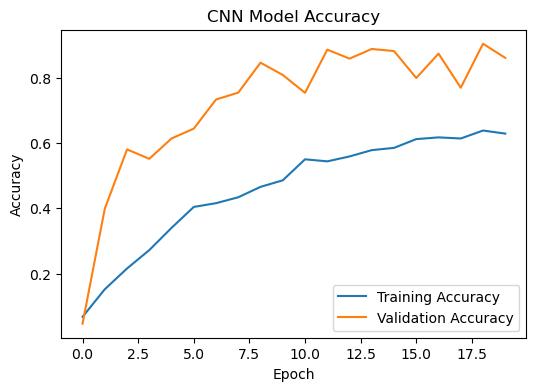

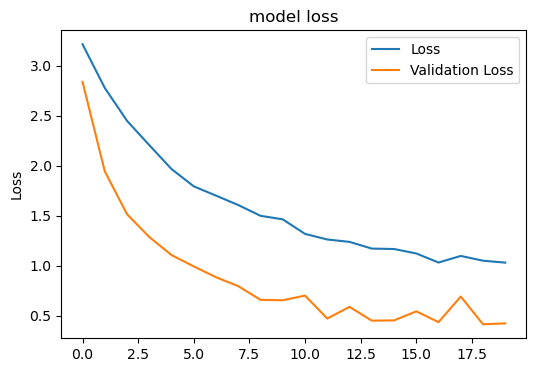

In [10]:
# Plot accuracy for CNN model
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss for CNN model
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

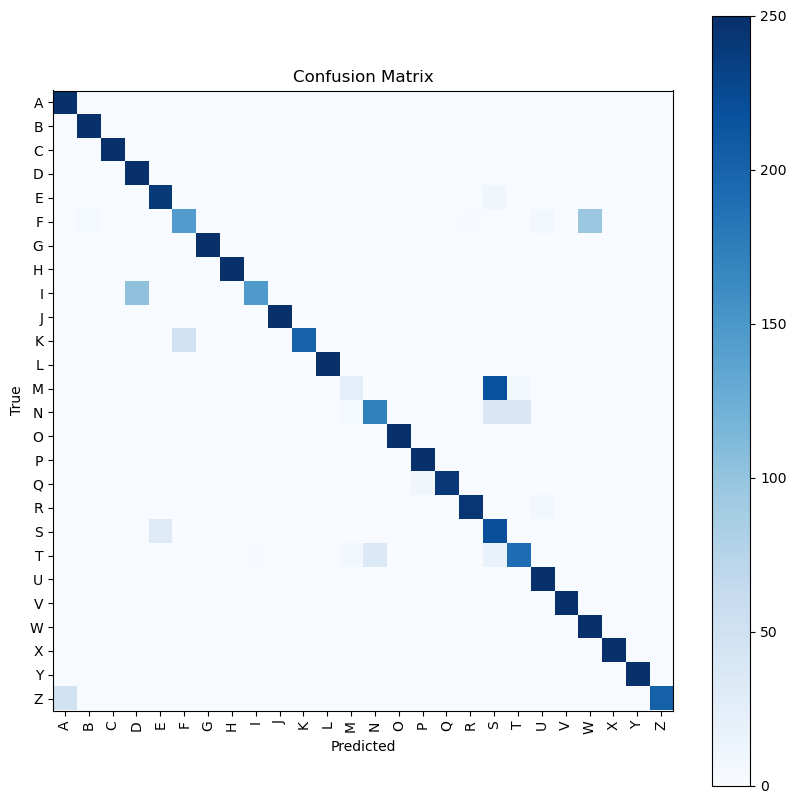

In [11]:
# Plot confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(26), test_generator.class_indices.keys(), rotation=90)
plt.yticks(np.arange(26), test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
# Save the model
model.save('sign_language_cnn_model.h5')

# VGG MODEL

In [13]:
# Load the VGG16 model with pretrained weights 
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


In [14]:
# Freeze the layers in the VGG model
for layer in vgg_model.layers:
    layer.trainable = False

In [15]:
# Building VGG model
model1 = Sequential([
    vgg_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax') 
    ])

In [16]:
# Compile the VGG model
model1.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'
              ])

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 26)                6682      
                                                                 
Total params: 15245914 (58.16 MB)
Trainable params: 531226 (2.03 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [18]:
# Train the VGG model
history_vgg = model1.fit(train_generator,
                         steps_per_epoch=50, 
                         epochs=epochs, 
                         validation_data=test_generator,
                         verbose = 1,
                         validation_steps = 128)

Epoch 1/20
50/50 [==============================] - 44s 887ms/step - loss: 2.8356 - accuracy: 0.1975 - val_loss: 1.9618 - val_accuracy: 0.5605
Epoch 2/20
50/50 [==============================] - 44s 897ms/step - loss: 2.0475 - accuracy: 0.3850 - val_loss: 1.2147 - val_accuracy: 0.7527
Epoch 3/20
50/50 [==============================] - 44s 895ms/step - loss: 1.6293 - accuracy: 0.4831 - val_loss: 0.9356 - val_accuracy: 0.7920
Epoch 4/20
50/50 [==============================] - 44s 892ms/step - loss: 1.4056 - accuracy: 0.5487 - val_loss: 0.7777 - val_accuracy: 0.8308
Epoch 5/20
50/50 [==============================] - 45s 916ms/step - loss: 1.2868 - accuracy: 0.5825 - val_loss: 0.6707 - val_accuracy: 0.8374
Epoch 6/20
50/50 [==============================] - 46s 936ms/step - loss: 1.1134 - accuracy: 0.6319 - val_loss: 0.5949 - val_accuracy: 0.8572
Epoch 7/20
50/50 [==============================] - 46s 928ms/step - loss: 1.0320 - accuracy: 0.6556 - val_loss: 0.4661 - val_accuracy: 0.9192

In [19]:
# Evaluate the model
test_loss, test_acc = model1.evaluate(test_generator)
y_pred = model1.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Get the true labels from the test data generator
y_true = test_generator.classes

# Calculate precision, recall, and F1 score
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(report)

f1 = f1_score(y_true, y_pred_classes, average='weighted')  # or average='macro' or 'micro'
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss:.4f}")
print(f"F1 score: {f1}")

204/204 [==============================] - 54s 262ms/step
              precision    recall  f1-score   support

           A       1.00      0.98      0.99       250
           B       0.99      1.00      0.99       250
           C       1.00      0.94      0.97       250
           D       1.00      0.86      0.92       250
           E       0.95      0.91      0.93       250
           F       0.89      0.92      0.91       250
           G       1.00      1.00      1.00       250
           H       1.00      1.00      1.00       250
           I       0.84      1.00      0.91       250
           J       1.00      1.00      1.00       250
           K       0.87      0.98      0.92       250
           L       1.00      1.00      1.00       250
           M       0.85      0.42      0.56       250
           N       0.48      0.98      0.65       250
           O       0.95      1.00      0.97       250
           P       1.00      1.00      1.00       250
           Q       1.00

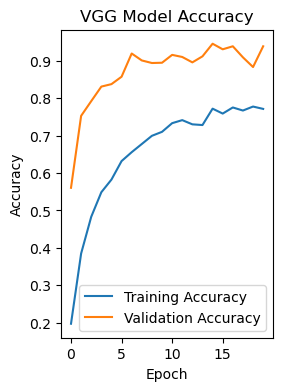

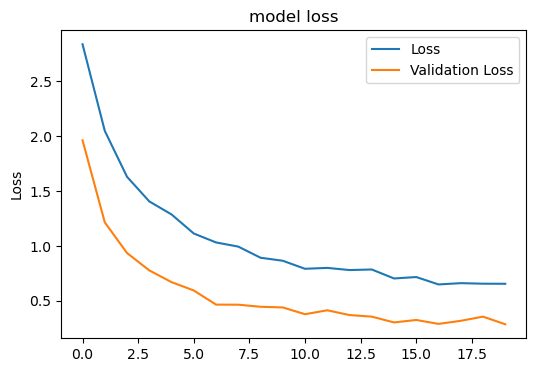

In [20]:
# Plot accuracy for VGG model
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss for VGG model
plt.figure(figsize=(6, 4))
plt.plot(history_vgg.history['loss'], label='Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.title('model loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

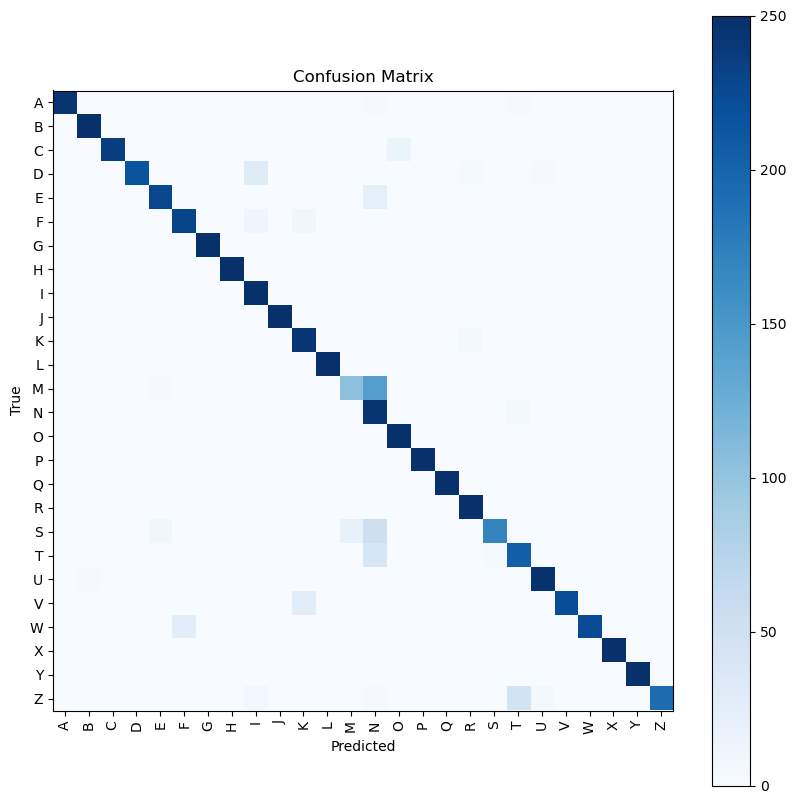

In [21]:
# Plot confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(26), test_generator.class_indices.keys(), rotation=90)
plt.yticks(np.arange(26), test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
# Save the model
model1.save('sign_language_vgg_model.h5')

# RESNET MODEL

In [23]:
# Load the ResNet50 model with pretrained weights (remove the top fully connected layers)
resnet_model = ResNet50(weights='imagenet', 
                        include_top=False, 
                        input_shape=(64, 64, 3))

In [24]:
# Freeze the layers in the ResNet model
for layer in resnet_model.layers:
    layer.trainable = False

In [25]:
# Build your custom model on top of ResNet
model2 = Sequential([
    resnet_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax') 
    ])

In [26]:
# Compile the ResNet model
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'
             ])

In [27]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 26)                6682      
                                                                 
Total params: 25691802 (98.01 MB)
Trainable params: 2104090 (8.03 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [28]:
# Train the ResNet model
history_resnet = model2.fit(train_generator,
                            steps_per_epoch=50, 
                            epochs=epochs, 
                            validation_data=test_generator,
                            verbose = 1,
                            validation_steps = 128)


Epoch 1/20
50/50 [==============================] - 21s 406ms/step - loss: 3.1340 - accuracy: 0.1006 - val_loss: 2.5850 - val_accuracy: 0.2554
Epoch 2/20
50/50 [==============================] - 20s 398ms/step - loss: 2.8306 - accuracy: 0.1656 - val_loss: 2.1944 - val_accuracy: 0.4053
Epoch 3/20
50/50 [==============================] - 20s 411ms/step - loss: 2.6261 - accuracy: 0.2056 - val_loss: 2.0016 - val_accuracy: 0.3696
Epoch 4/20
50/50 [==============================] - 21s 426ms/step - loss: 2.4245 - accuracy: 0.2425 - val_loss: 1.7606 - val_accuracy: 0.5083
Epoch 5/20
50/50 [==============================] - 21s 431ms/step - loss: 2.4015 - accuracy: 0.2644 - val_loss: 1.5963 - val_accuracy: 0.6204
Epoch 6/20
50/50 [==============================] - 22s 440ms/step - loss: 2.2650 - accuracy: 0.2994 - val_loss: 1.5514 - val_accuracy: 0.4998
Epoch 7/20
50/50 [==============================] - 22s 451ms/step - loss: 2.2132 - accuracy: 0.2894 - val_loss: 1.5158 - val_accuracy: 0.5381

In [29]:
# Evaluate the model
test_loss, test_acc = model2.evaluate(test_generator)
y_pred = model1.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Get the true labels from the test data generator
y_true = test_generator.classes

# Calculate precision, recall, and F1 score
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(report)

f1 = f1_score(y_true, y_pred_classes, average='weighted')  # or average='macro' or 'micro'\
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss:.4f}")
print(f"F1 score: {f1}")

204/204 [==============================] - 50s 244ms/step
              precision    recall  f1-score   support

           A       1.00      0.98      0.99       250
           B       0.99      1.00      0.99       250
           C       1.00      0.94      0.97       250
           D       1.00      0.86      0.92       250
           E       0.95      0.91      0.93       250
           F       0.89      0.92      0.91       250
           G       1.00      1.00      1.00       250
           H       1.00      1.00      1.00       250
           I       0.84      1.00      0.91       250
           J       1.00      1.00      1.00       250
           K       0.87      0.98      0.92       250
           L       1.00      1.00      1.00       250
           M       0.85      0.42      0.56       250
           N       0.48      0.98      0.65       250
           O       0.95      1.00      0.97       250
           P       1.00      1.00      1.00       250
           Q       1.00

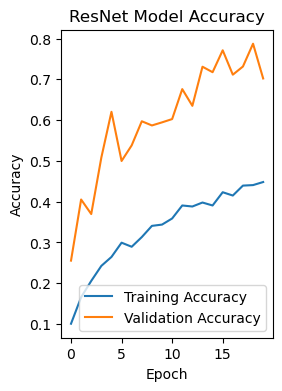

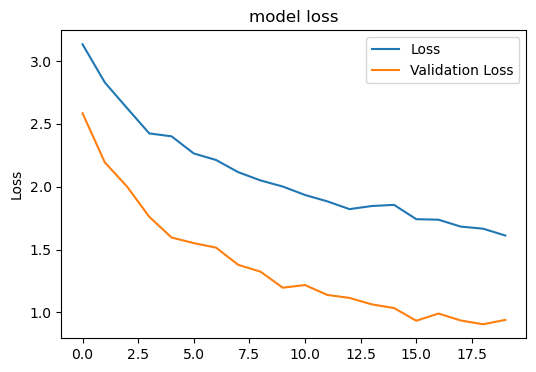

In [30]:
# Plot accuracy for ResNet model
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss for ResNet model
plt.figure(figsize=(6, 4))
plt.plot(history_resnet.history['loss'], label='Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('model loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

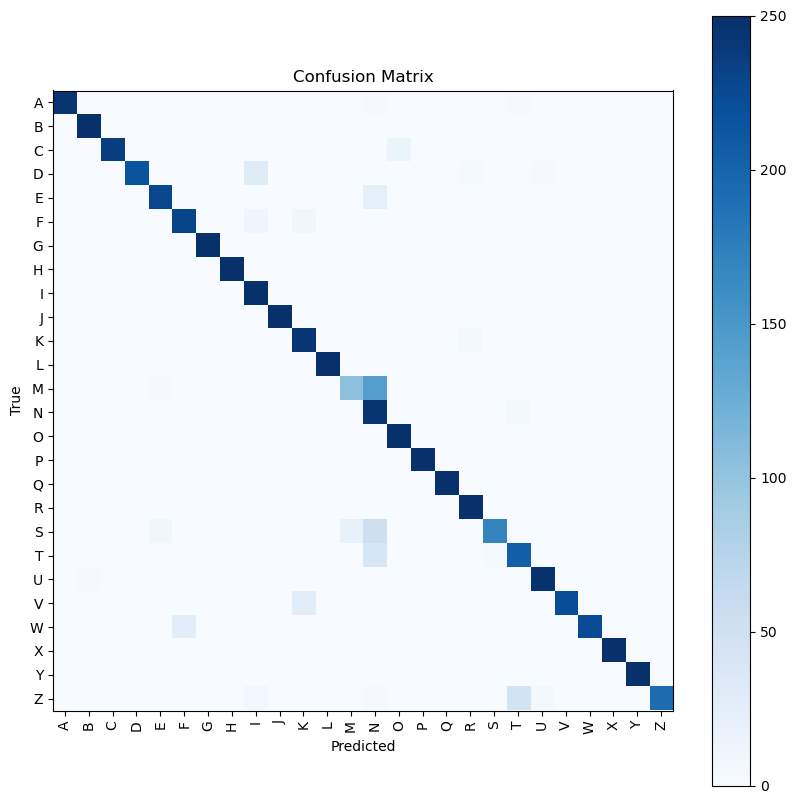

In [31]:
# Plot confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(26), test_generator.class_indices.keys(), rotation=90)
plt.yticks(np.arange(26), test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
# Save the model
model2.save('sign_language_resnet_model.h5')

# Comparison of Validation Accuracies

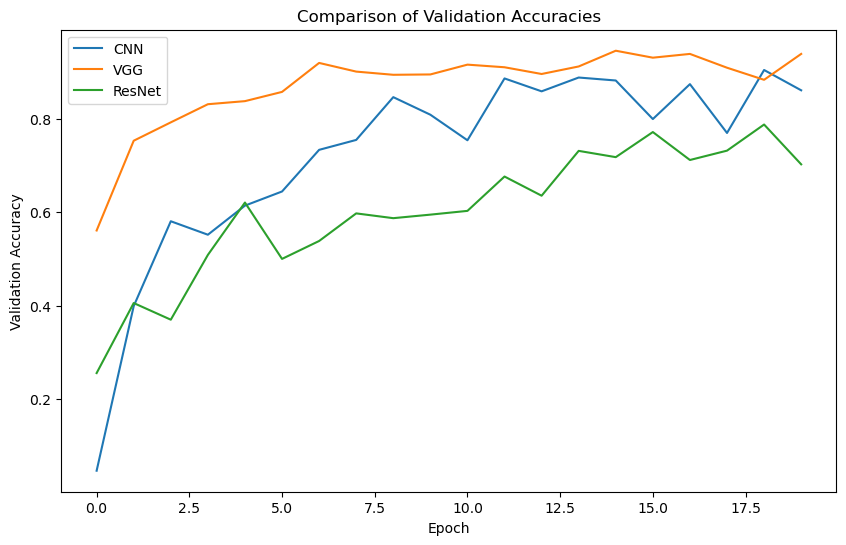

In [33]:
import matplotlib.pyplot as plt

# List of model names and their corresponding histories
model_names = ['CNN', 'VGG', 'ResNet']  # Add more model names as needed
model_histories = [history, history_vgg, history_resnet]  # Replace with actual histories

# Extract validation accuracies from the histories
val_accuracies = [history.history['val_accuracy'] for history in model_histories]

# Plot comparison of validation accuracies
plt.figure(figsize=(10, 6))
for name, acc in zip(model_names, val_accuracies):
    plt.plot(acc, label=name)

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Validation Accuracies')
plt.legend()
plt.show()

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('sign_language_cnn_model.h5')  # Replace with your model path

# Define class labels
class_labels = ['class1', 'class2', 'class3', ...]  # Replace with your class labels

# Open the camera
camera = cv2.VideoCapture(0)

while True:
    ret, frame = camera.read()
    
    # Preprocess the frame
    frame = cv2.resize(frame, (224, 224))
    frame = np.expand_dims(frame, axis=0)
    frame = frame / 255.0  # Normalize pixel values
    
    # Predict the sign using the model
    prediction = model.predict(frame)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]
    
    # Display the frame and prediction
    cv2.putText(frame, predicted_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Sign Recognition', frame)
    
    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()
